In [2]:
import json

fashion = mnist= cifar10=""
with open('ela_fashion1000-2.json') as json_file:
    fashion = json.load(json_file)
with open('ela_mnist1000-2.json') as json_file:
    mnist = json.load(json_file)
with open('ela_cifar1000-2.json') as json_file:
    cifar10 = json.load(json_file)
    
print(json.dumps(fashion, indent=4, sort_keys=True))

print(json.dumps(mnist, indent=4, sort_keys=True))

{
    "basic": {
        "basic.blocks_max": 1,
        "basic.blocks_min": 1,
        "basic.cells_filled": 1,
        "basic.cells_total": 1,
        "basic.costs_fun_evals": 0,
        "basic.costs_runtime": 0.0,
        "basic.dim": 26,
        "basic.lower_max": 0.0,
        "basic.lower_min": 0.0,
        "basic.minimize_fun": false,
        "basic.objective_max": 0.9200000166893004,
        "basic.objective_min": 0.10000000149011612,
        "basic.observations": 1000,
        "basic.upper_max": 1.0,
        "basic.upper_min": 1.0
    },
    "cm_angle": {
        "cm_angle.angle.mean": 104.6682707187446,
        "cm_angle.angle.sd": NaN,
        "cm_angle.costs_fun_evals": 0,
        "cm_angle.costs_runtime": 0.0030000000000001137,
        "cm_angle.dist_ctr2best.mean": 1.6065205119920714,
        "cm_angle.dist_ctr2best.sd": NaN,
        "cm_angle.dist_ctr2worst.mean": 1.6460216841557027,
        "cm_angle.dist_ctr2worst.sd": NaN,
        "cm_angle.y_ratio_best2worst.mean": 1.0

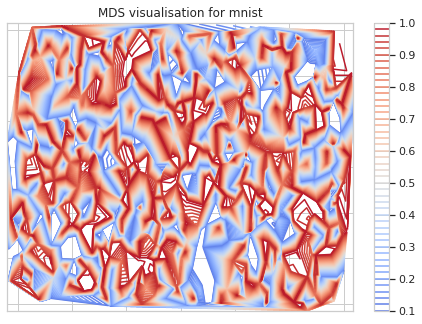

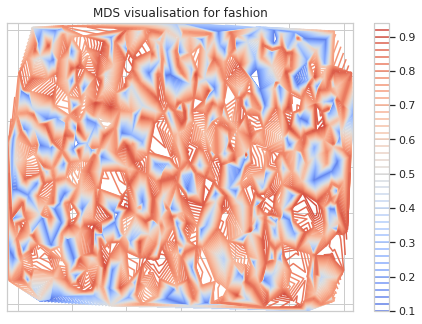

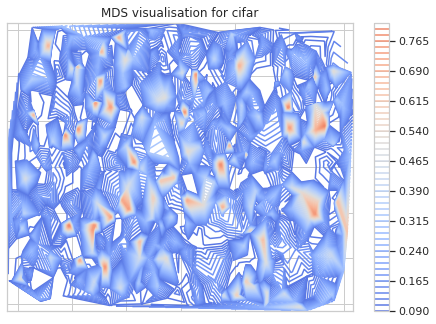

In [7]:
%matplotlib inline
#plot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

for dataset in ["mnist","fashion","cifar"]:
    data = pd.read_csv('results/1000/'+dataset+'-results2.log', delimiter=',')
    data['filters_1'] = data['filters_2']
    data['filters_2'] = data['filters_4']
    data = data.drop(columns=['stack_0', 'stack_1', 'stack_2','activation', 'activ_dense', 'max_pooling', 'filters_3', 'filters_4','filters_5'])
    sample = data.values[:,:-2]
    obj_values = list(data.values[:,-2])
    
    similarities = euclidean_distances(sample)
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=42,
                   dissimilarity="precomputed", n_jobs=5)
    
    pos = mds.fit(similarities).embedding_

    # Rescale the data
    pos *= np.sqrt((sample ** 2).sum()) / np.sqrt((pos ** 2).sum())
    # Rotate the data
    clf = PCA(n_components=2)
    pos = clf.fit_transform(pos)
    #rotation matrix
    t = np.array([[1,0.5],[-1,0.5]])
    pos = np.dot(pos, t)

    #if (dataset=="cifar10"):
    #    obj_values = np.array(obj_values) * 2

    fig = plt.figure(1)
    ax = plt.axes([0., 0., 1., 1.])
    plt.title("MDS visualisation for "+dataset)
    s = 100
    #plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
    plt.tricontour(pos[:, 0], pos[:, 1], obj_values, vmin = 0., vmax = 1., levels=50, cmap='coolwarm');
    plt.colorbar()
    plt.clim(0,1)
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    plt.show()
    
    

                  perf      time
s_0          -0.101215 -0.307006
s_1          -0.106246 -0.028498
s_2          -0.002748  0.035629
filters_0    -0.060321  0.431982
filters_1     0.062519  0.226386
filters_2     0.104341  0.094879
k_0           0.146719  0.361472
k_1           0.060479  0.012945
k_2           0.174345  0.196804
k_3          -0.001892 -0.019860
k_4           0.081799  0.117176
k_5           0.080750  0.016411
dropout_0     0.013741 -0.010595
dropout_1     0.004061  0.035215
dropout_2     0.000735 -0.009716
dropout_3    -0.091968 -0.034990
dropout_4    -0.144716 -0.049599
dropout_5    -0.166696  0.002207
dropout_6    -0.143245  0.020345
lr            0.117919  0.017332
l2           -0.484890  0.054343
dense_size_0  0.012396  0.037141
dense_size_1  0.005574  0.020561
perf          1.000000  0.133657
time          0.133657  1.000000


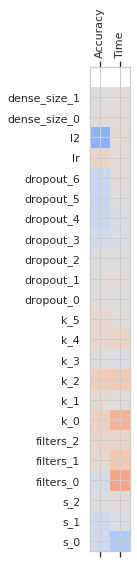

                  perf      time
s_0          -0.109108 -0.306019
s_1          -0.072984 -0.028646
s_2          -0.026392  0.037347
filters_0    -0.003525  0.431297
filters_1     0.086655  0.228911
filters_2     0.148191  0.095810
k_0           0.232138  0.360541
k_1          -0.033528  0.014309
k_2           0.197657  0.196891
k_3          -0.046671 -0.020460
k_4           0.103477  0.117657
k_5           0.083443  0.017869
dropout_0    -0.099874 -0.010859
dropout_1    -0.032490  0.035144
dropout_2    -0.026825 -0.009466
dropout_3    -0.107855 -0.033377
dropout_4    -0.165970 -0.048839
dropout_5    -0.201557  0.001231
dropout_6    -0.115731  0.021505
lr            0.206465  0.019250
l2           -0.276090  0.058665
dense_size_0  0.024971  0.036410
dense_size_1  0.013776  0.020556
perf          1.000000  0.162192
time          0.162192  1.000000


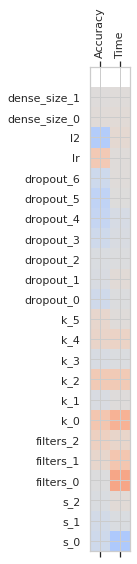

                  perf      time
s_0          -0.037414 -0.344909
s_1          -0.068661 -0.043105
s_2          -0.004554  0.021207
filters_0     0.029087  0.446770
filters_1     0.072474  0.240990
filters_2     0.042088  0.101757
k_0           0.179251  0.323680
k_1           0.005132 -0.000575
k_2           0.130926  0.175733
k_3          -0.025792 -0.019969
k_4           0.110890  0.094689
k_5           0.051750  0.013851
dropout_0    -0.412338 -0.034392
dropout_1    -0.051682  0.024170
dropout_2    -0.074760 -0.002083
dropout_3    -0.051521 -0.034480
dropout_4    -0.134178 -0.055049
dropout_5    -0.151648 -0.002343
dropout_6    -0.083251  0.012783
lr            0.117375  0.023887
l2           -0.362886  0.050666
dense_size_0  0.007843  0.031224
dense_size_1  0.024830  0.020390
perf          1.000000  0.165134
time          0.165134  1.000000


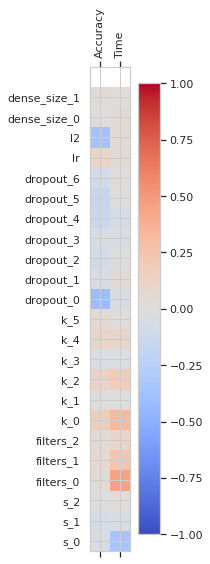

correlation between correlations
            mnist   fashion   cifar10
mnist    1.000000  0.966634  0.918871
fashion  0.966634  1.000000  0.950065
cifar10  0.918871  0.950065  1.000000


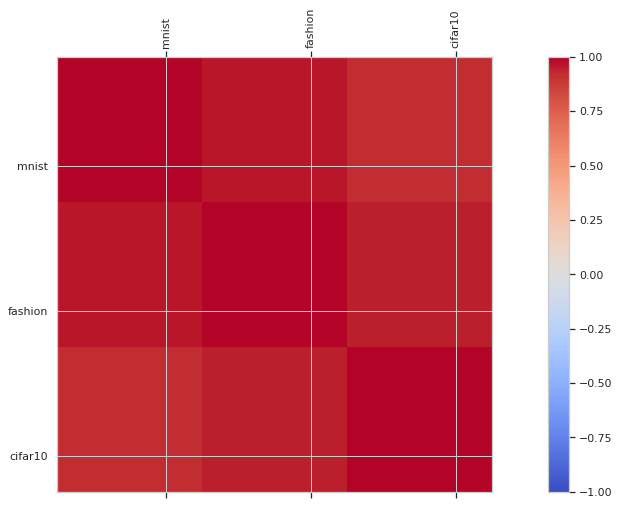

In [21]:
perf_cors = []

for dataset in ["mnist","fashion","cifar"]:
    data = pd.read_csv('results/1000/'+dataset+'-results2.log', delimiter=',')
    data['filters_1'] = data['filters_2']
    data['filters_2'] = data['filters_4']
    data = data.drop(columns=['stack_0', 'stack_1', 'stack_2','activation', 'activ_dense', 'max_pooling', 'filters_3', 'filters_4','filters_5'])
    sample = data.values[:,:-2]
    obj_values = list(data.values[:,-2])
    
    corr = data[data.columns[:]].corr()[data.columns[-2:]][:]
    perf_cors.append(corr['perf'].values)
    print(corr)
    corr = corr.values[:-2]
    if (dataset == "cifar"):
        fig = plt.figure(figsize=(3,8))
    else:
        fig = plt.figure(figsize=(3,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    if (dataset == "cifar"):
        
        fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns)-2,1)

    ax.set_xticks(ticks[:2])
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(['Accuracy','Time'])
    ax.set_yticklabels(data.columns[:-2])
    ax.set_ylim([-0.5,23.5])
    fig.tight_layout()
    plt.savefig("corr-"+dataset+"-1.pdf")
    plt.show()

print("correlation between correlations")
perf_cors = np.array(perf_cors).T
d = pd.DataFrame(perf_cors, columns=["mnist","fashion","cifar10"])
print(d.corr())
corr = d.corr()
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0.25,len(d.columns)+.25,1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(d.columns)
ax.set_yticklabels(d.columns)
plt.show()

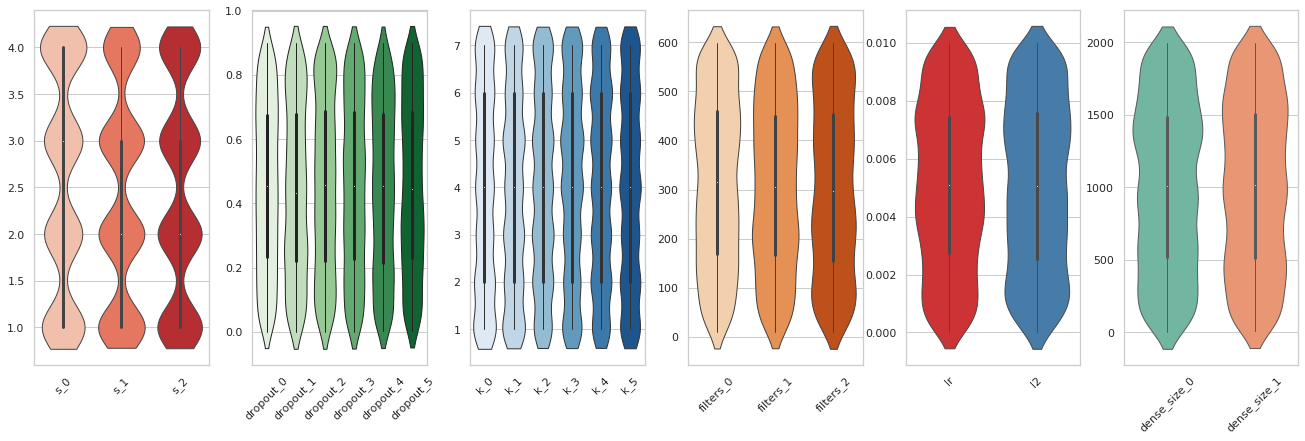

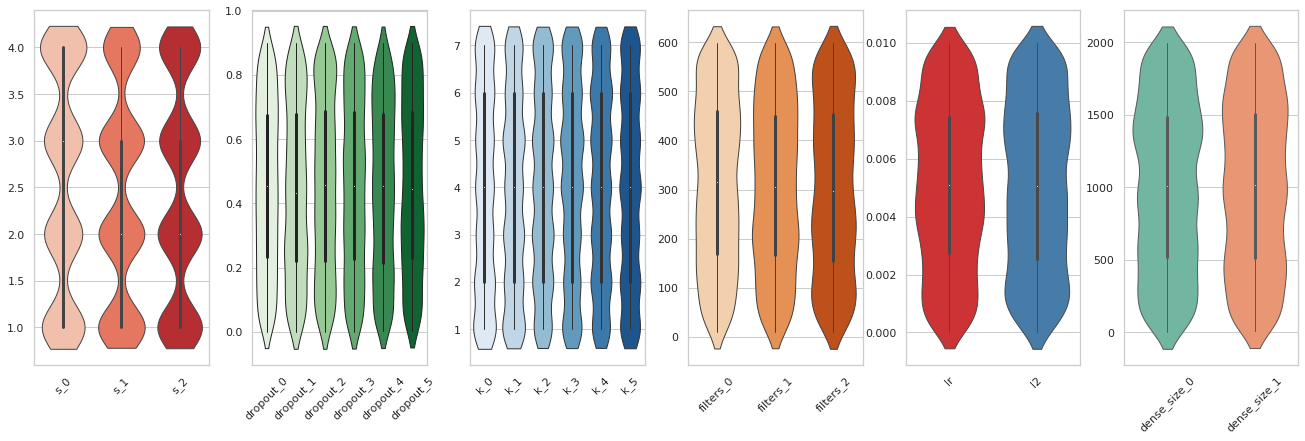

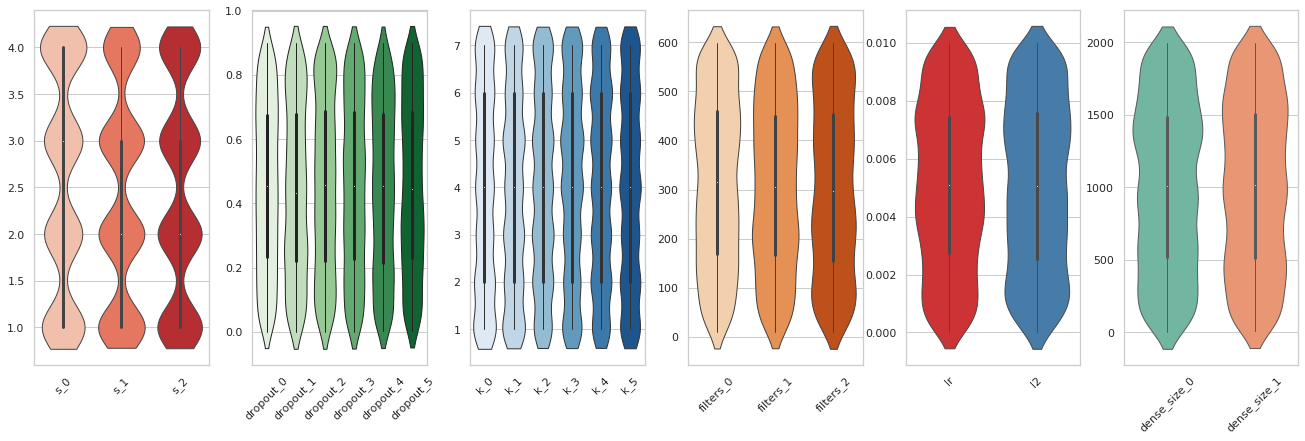

In [9]:
#boxplots
import seaborn as sns
sns.set(style="whitegrid")

for dataset in ["mnist","fashion","cifar"]:
    data = pd.read_csv('results/1000/'+dataset+'-results2.log', delimiter=',')
    data['filters_1'] = data['filters_2']
    data['filters_2'] = data['filters_4']
    data = data.drop(columns=['stack_0', 'stack_1', 'stack_2','activation', 'activ_dense', 'max_pooling', 'filters_3', 'filters_4','filters_5'])
    sample = data.values[:,:-2]
    obj_values = list(data.values[:,-2])
    
    #data.boxplot(rot=90, figsize=[18,8], column=['s_0','s_1','s_2'])
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(1,6,figsize=(18, 6))

    sns.violinplot(ax = ax[0], data=data[['s_0','s_1','s_2']], palette="Reds", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[1], data=data[['dropout_0','dropout_1','dropout_2','dropout_3','dropout_4','dropout_5']], palette="Greens", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[2], data=data[['k_0','k_1','k_2','k_3','k_4','k_5']], palette="Blues", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[3], data=data[['filters_0','filters_1','filters_2']], palette="Oranges", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[4], data=data[['lr','l2']], palette="Set1", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[5], data=data[['dense_size_0','dense_size_1']], palette="Set2", bw=.2, cut=1, linewidth=1)
    for a in ax:
        a.set_xticklabels(a.get_xticklabels(),rotation=45)
    f.tight_layout(pad=0.2)
    # Finalize the figure
    #ax.set(ylim=(-.7, 1.05))
    #sns.despine(left=True, bottom=True)
    plt.show()


50


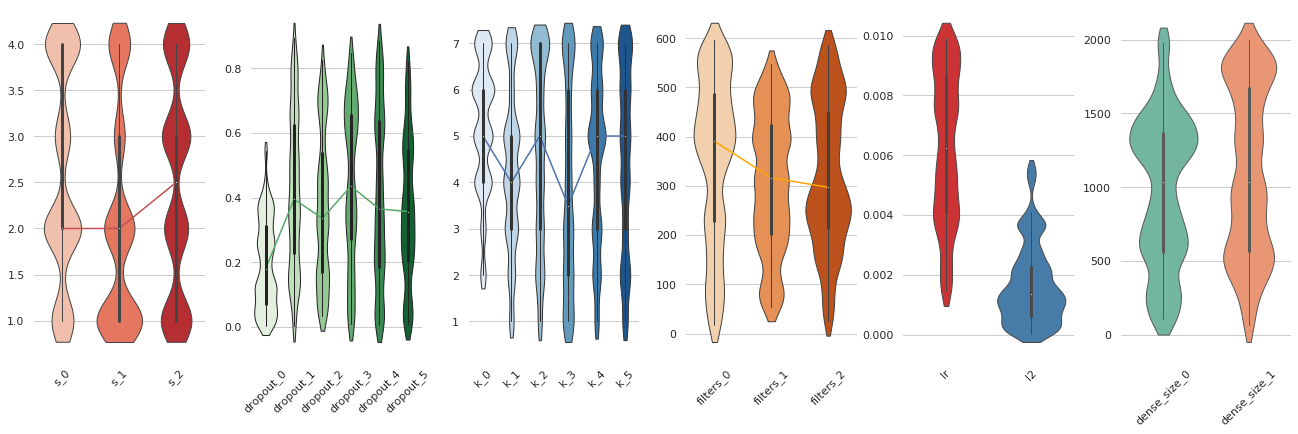

49


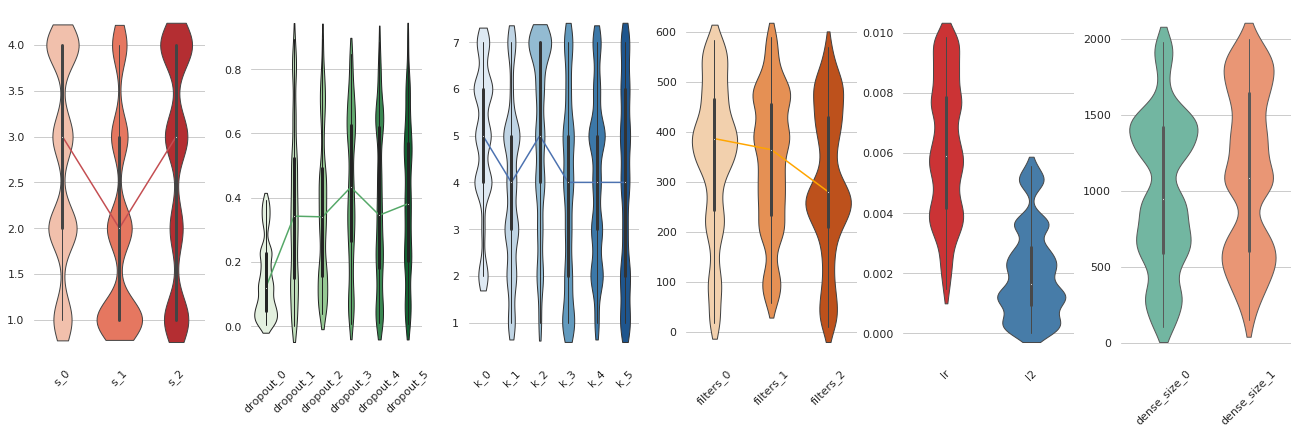

50


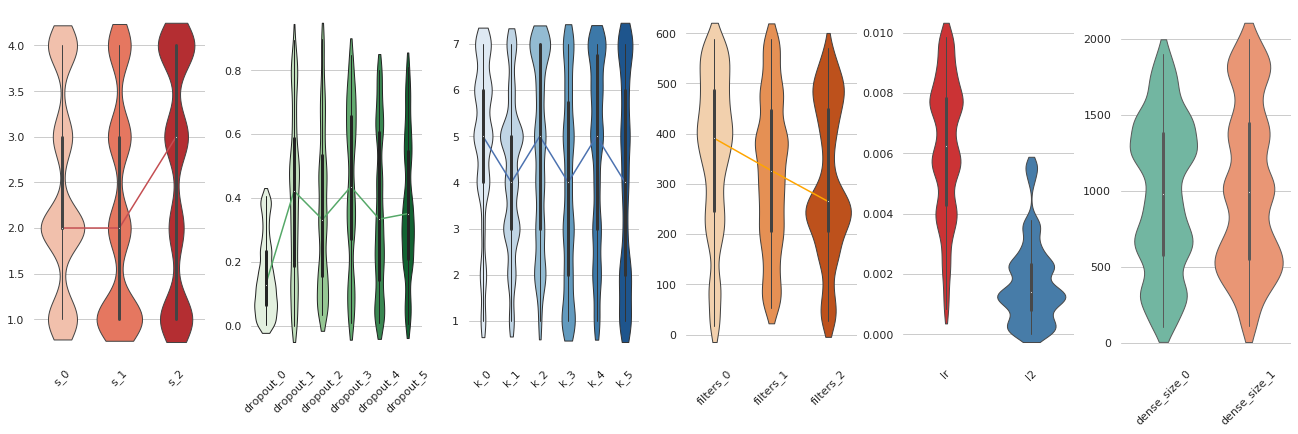

In [13]:
#top 10
for dataset in ["mnist","fashion","cifar"]:
    data = pd.read_csv('results/1000/'+dataset+'-results2.log', delimiter=',')
    data['filters_1'] = data['filters_2']
    data['filters_2'] = data['filters_4']
    data = data.drop(columns=['stack_0', 'stack_1', 'stack_2','activation', 'activ_dense', 'max_pooling', 'filters_3', 'filters_4','filters_5'])
    top10perf = data.quantile(.95)['perf']
    
    data = data[data['perf']>top10perf]
    print(len(data))
    
    data['s_0 x k_1'] = data['s_0'] + data['k_1']
    data['s_1 x k_3'] = data['s_1'] + data['k_3']
    data['s_2 x k_5'] = data['s_2'] + data['k_5']
    
    data['nr Params 0'] = data['filters_0'] * (data['k_0']**2 + 1)
    data['nr Params 1'] = data['filters_1'] * (data['k_1']**2 + 1)
    data['nr Params 2'] = data['filters_2'] * (data['k_2']**2 + 1)

    
    f, ax = plt.subplots(1,6,figsize=(18, 6))
    ax[0].plot( data[['s_0','s_1','s_2']].median(), color='r')
    #sns.violinplot(ax = ax[1], data=data[['s_0 x k_1','s_1 x k_3','s_2 x k_5']], palette="Reds", bw=.2, cut=1, linewidth=1)
    ax[1].plot( data[['dropout_0','dropout_1','dropout_2','dropout_3','dropout_4','dropout_5']].median(), color='g')
    ax[2].plot( data[['k_0','k_1','k_2','k_3','k_4','k_5']].median(), color='b')
    ax[3].plot( data[['filters_0','filters_1','filters_2']].median(), color='orange')
   #ax[4].plot( data[['nr Params 0','nr Params 1','nr Params 2']].median(), color='k')
    sns.violinplot(ax = ax[0], data=data[['s_0','s_1','s_2']], palette="Reds", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[1], data=data[['dropout_0','dropout_1','dropout_2','dropout_3','dropout_4','dropout_5']], palette="Greens", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[2], data=data[['k_0','k_1','k_2','k_3','k_4','k_5']], palette="Blues", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[3], data=data[['filters_0','filters_1','filters_2']], palette="Oranges", bw=.2, cut=1, linewidth=1)
    
    #sns.violinplot(ax = ax[4], data=data[['nr Params 0','nr Params 1','nr Params 2']], palette="Set1", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[4], data=data[['lr','l2']], palette="Set1", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[5], data=data[['dense_size_0','dense_size_1']], palette="Set2", bw=.2, cut=1, linewidth=1)
    for a in ax:
        a.set_xticklabels(a.get_xticklabels(),rotation=45)
    
    # Finalize the figure
    #ax.set(ylim=(-.7, 1.05))
    sns.despine(left=True, bottom=True)
    f.tight_layout(pad=0.5)
    plt.savefig(dataset+'-violin-1.pdf')
    plt.show()